In [4]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix

np.random.seed(0)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


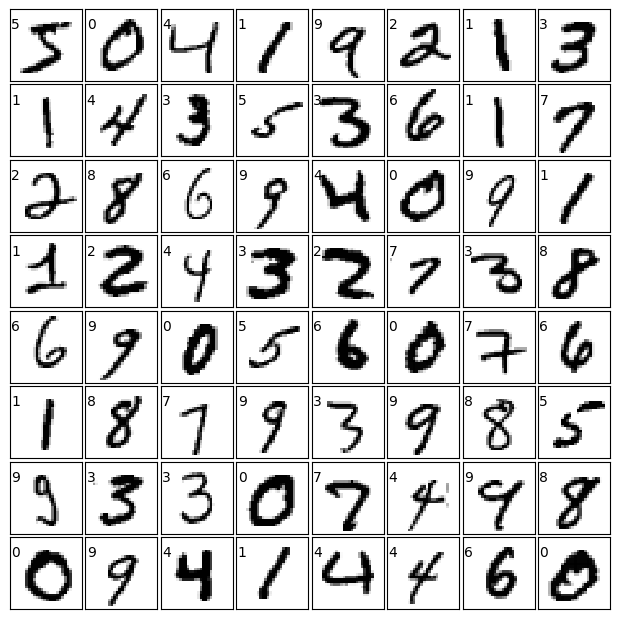

In [8]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

In [9]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
training_epochs = 5 # Total number of training epochs
learning_rate = 0.003 # The learning rate

In [54]:
def create_model():
    model = Sequential()

    #model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    #model.add(MaxPooling2D((2, 2)))
    #model.add(Conv2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    #model.add(BatchNormalization())

    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [55]:
model = create_model()
#model.build()
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/5
1875/1875 - 4s - loss: 0.2080 - accuracy: 0.9369 - val_loss: 0.1056 - val_accuracy: 0.9666 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 3s - loss: 0.0976 - accuracy: 0.9699 - val_loss: 0.0954 - val_accuracy: 0.9710 - 3s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 3s - loss: 0.0737 - accuracy: 0.9771 - val_loss: 0.0829 - val_accuracy: 0.9750 - 3s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 3s - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0824 - val_accuracy: 0.9764 - 3s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 3s - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.1023 - val_accuracy: 0.9711 - 3s/epoch - 2ms/step


In [57]:
prediction_probabilities = model.predict(X_test)
prediction_classes = prediction_probabilities.argmax(axis=-1)

313/313 [==============================] - 0s 905us/step


In [58]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0414, accuracy: 98.6667%
Evaluating on testing set...
loss=0.1023, accuracy: 97.1100%


Maximum Loss : 0.2080
Minimum Loss : 0.0501
Loss difference : 0.1579


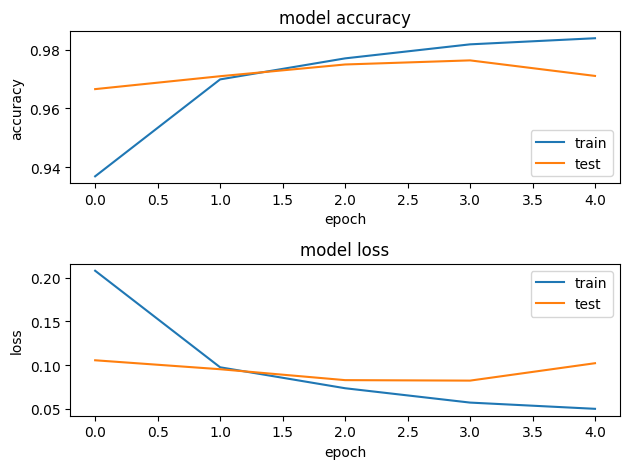

In [59]:
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

Text(0.5, 23.52222222222222, 'Predicted')

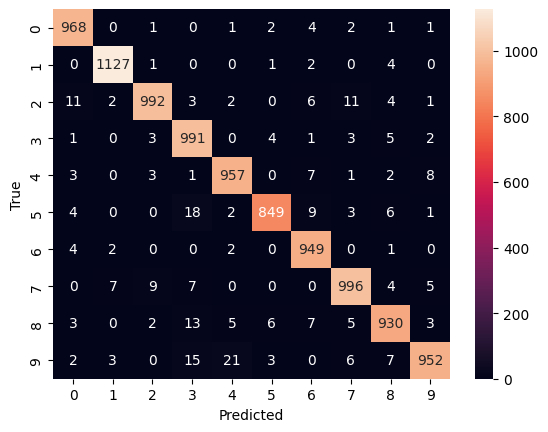

In [60]:
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, prediction_classes) 
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [61]:
model.save_weights("CNN_tf.keras_mnist.h5")

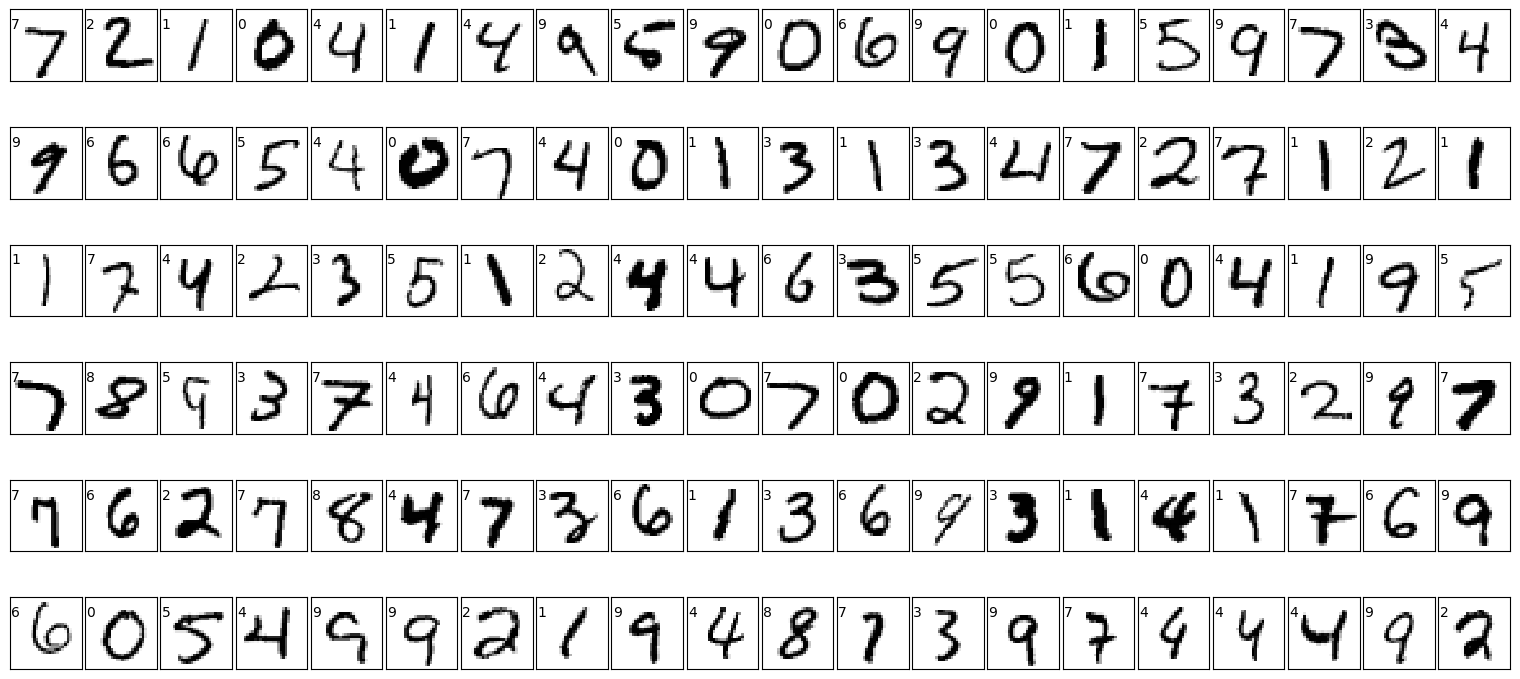

In [62]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_classes[i]))